## Test 01

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

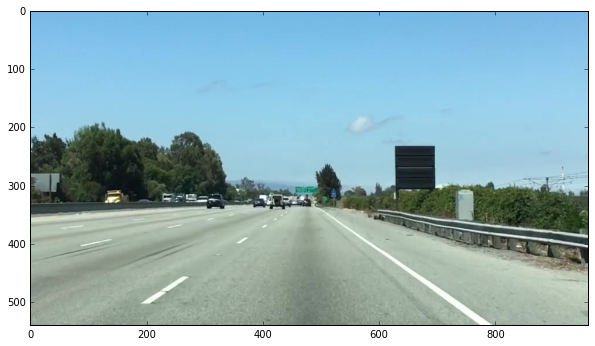

In [2]:
# Read in the image
image = mpimg.imread('images/test.jpg')
# Display the image       
plt.figure(figsize=(10,10))
plt.imshow(image)
plt.show()

In [3]:
# Grab the x and y size and make a copy of the image
ysize = image.shape[0]
xsize = image.shape[1]
color_select = np.copy(image)
print(xsize, ysize)

960 540


In [4]:
# Define color selection criteria
red_threshold = 200
green_threshold = 200
blue_threshold = 200
rgb_threshold = [red_threshold, green_threshold, blue_threshold]

In [5]:
# Do a boolean or with the "|" character 
# to identify pixels below the thresholds
thresholds = (image[:,:,0] < rgb_threshold[0]) \
            |(image[:,:,1] < rgb_threshold[1]) \
            |(image[:,:,2] < rgb_threshold[2])
        
color_select[thresholds] = [0,0,0]

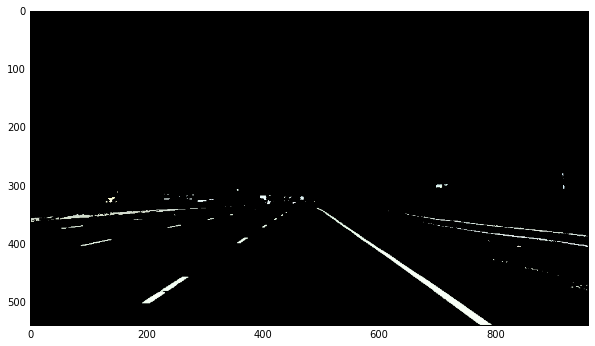

In [6]:
# Display the image                 
plt.figure(figsize=(10,10))
plt.imshow(color_select)
plt.show()

In [7]:
# make another copy of the original image
region_select = np.copy(image)

In [8]:
# Define a triangle region of interest 
# the origin (x=0, y=0) is in the upper-left in image processing
apex = [475, 320]
left_bottom = [0, 539]
right_bottom = [900, 539]

In [9]:
# Fit lines (y=Ax+B) to identify the  3 sided region of interest
# np.polyfit() returns the coefficients [A, B] of the fit
fit_left = np.polyfit((left_bottom[0], apex[0]), (left_bottom[1], apex[1]), 1)
fit_right = np.polyfit((right_bottom[0], apex[0]), (right_bottom[1], apex[1]), 1)
fit_bottom = np.polyfit((left_bottom[0], right_bottom[0]), (left_bottom[1], right_bottom[1]), 1)

In [10]:
# Find the region inside the lines
XX, YY = np.meshgrid(np.arange(0, xsize), np.arange(0, ysize))
region_thresholds = (YY > (XX*fit_left[0] + fit_left[1])) & \
                    (YY > (XX*fit_right[0] + fit_right[1])) & \
                    (YY < (XX*fit_bottom[0] + fit_bottom[1]))

In [11]:
# Color pixels red which are inside the region of interest
region_select[region_thresholds] = [255, 0, 0]

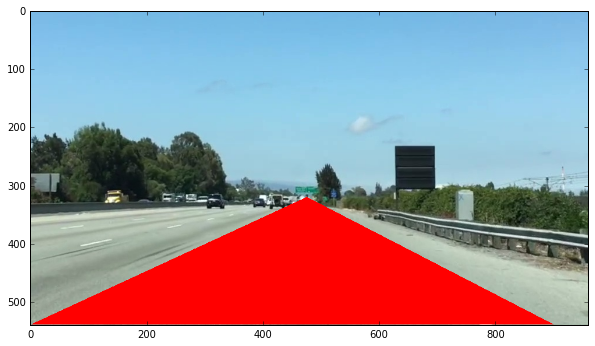

In [12]:
# Display the image
plt.figure(figsize=(10,10))
plt.imshow(region_select)
plt.show()

In [13]:
# make another copy of the original image
line_image = np.copy(image)

In [14]:
# Define color selection criteria
red_threshold = 200
green_threshold = 200
blue_threshold = 200

rgb_threshold = [red_threshold, green_threshold, blue_threshold]

# Mask pixels below the threshold
color_thresholds = (image[:,:,0] < rgb_threshold[0]) | \
                   (image[:,:,1] < rgb_threshold[1]) | \
                   (image[:,:,2] < rgb_threshold[2])
color_thresholds

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ..., 
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]], dtype=bool)

In [15]:
# Define the vertices of a triangular mask.
apex = [475, 320]
left_bottom = [0, 539]
right_bottom = [900, 539]

# Perform a linear fit (y=Ax+B) to each of the three sides of the triangle
fit_left = np.polyfit((left_bottom[0], apex[0]), (left_bottom[1], apex[1]), 1)
fit_right = np.polyfit((right_bottom[0], apex[0]), (right_bottom[1], apex[1]), 1)
fit_bottom = np.polyfit((left_bottom[0], right_bottom[0]), (left_bottom[1], right_bottom[1]), 1)


# Find the region inside the lines
XX, YY = np.meshgrid(np.arange(0, xsize), np.arange(0, ysize))
region_thresholds = (YY > (XX*fit_left[0] + fit_left[1])) & \
                    (YY > (XX*fit_right[0] + fit_right[1])) & \
                    (YY < (XX*fit_bottom[0] + fit_bottom[1]))
region_thresholds

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ..., 
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]], dtype=bool)

In [16]:
# Color pixels red where both color and region selections met
line_image[~color_thresholds & region_thresholds] = [255, 0, 0]
type(line_image)

numpy.ndarray

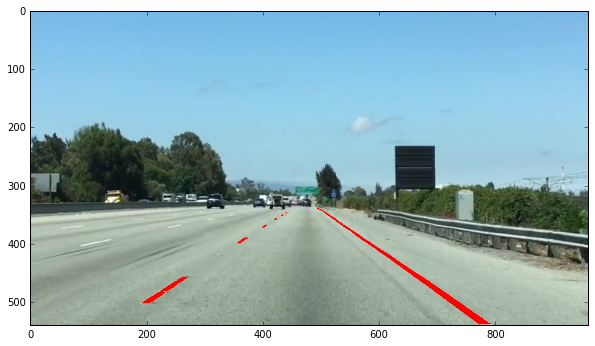

In [17]:
# Display the image and show region and color selections
plt.figure(figsize=(10,10))
plt.imshow(line_image)
plt.show()

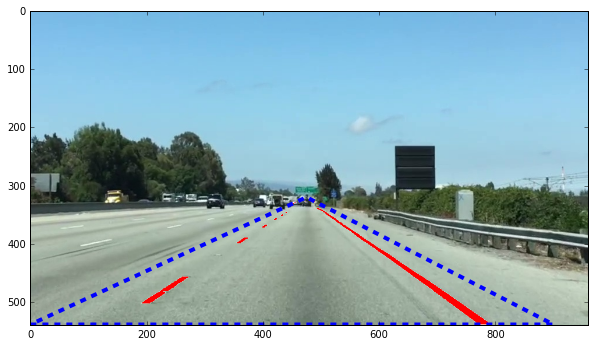

In [18]:
# Display the image and show region and color selections
plt.figure(figsize=(10,10))
x = [left_bottom[0], right_bottom[0], apex[0], left_bottom[0]]
y = [left_bottom[1], right_bottom[1], apex[1], left_bottom[1]]
plt.plot(x, y, 'b--', lw=4)
plt.imshow(line_image)
plt.show()